IOError: [Errno 2] No such file or directory: 'data/saa/data.p'

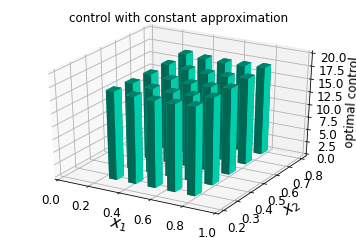

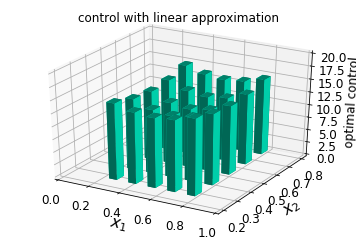

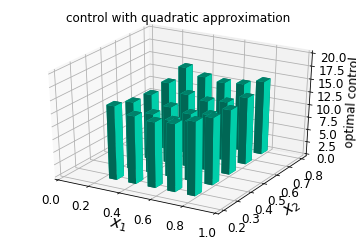

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pickle

x = np.linspace(0.25,.75,5)
y = np.linspace(0.25,0.75,5)
xv, yv = np.meshgrid(x,y)
xv = xv.reshape(25)
yv = yv.reshape(25)
zv = np.zeros(25)

dx = 0.05*np.ones(25)
dy = 0.05*np.ones(25)

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.bar3d(xv,yv,zv,dx,dy,18*np.ones(25),color='#00ceaa')
plt.axis('equal')
plt.ylim((0,1))
plt.xlim((0,1))
ax1.set_zlim(0, 20)
plt.title('target control')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)
plt.xlabel('width',fontsize=12)
plt.ylabel('height',fontsize=12)
fig.savefig("figure/control_target.pdf",format='pdf')


data = pickle.load( open( "data/constant/data.p", "rb" ) )
dz = data['opt_result'][0]

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.bar3d(xv,yv,zv,dx,dy,dz,color='#00ceaa')
plt.axis('equal')
plt.title('control with constant approximation')
plt.xlabel('$x_1$',fontsize=16)
plt.ylabel('$x_2$',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
ax1.set_zlabel('optimal control',fontsize=12)
plt.ylim((0,1))
plt.xlim((0,1))
ax1.set_zlim(0, 20)
fig.savefig("figure/control_constant.pdf",format='pdf')


data = pickle.load( open( "data/linear/data.p", "rb" ) )
dz = data['opt_result'][0]

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.bar3d(xv,yv,zv,dx,dy,dz,color='#00ceaa')
plt.axis('equal')
plt.title('control with linear approximation')
plt.xlabel('$x_1$',fontsize=16)
plt.ylabel('$x_2$',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
ax1.set_zlabel('optimal control',fontsize=12)
plt.ylim((0,1))
plt.xlim((0,1))
ax1.set_zlim(0, 20)
fig.savefig("figure/control_linear.pdf",format='pdf')

data = pickle.load( open( "data/quadratic/data.p", "rb" ) )
dz = data['opt_result'][0]

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.bar3d(xv,yv,zv,dx,dy,dz,color='#00ceaa')
plt.axis('equal')
plt.title('control with quadratic approximation')
plt.xlabel('$x_1$',fontsize=16)
plt.ylabel('$x_2$',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
ax1.set_zlabel('optimal control',fontsize=12)
plt.ylim((0,1))
plt.xlim((0,1))
ax1.set_zlim(0, 20)
fig.savefig("figure/control_quadratic.pdf",format='pdf')

data = pickle.load( open( "data/saa/data.p", "rb" ) )
dz = data['opt_result'][0]

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.bar3d(xv,yv,zv,dx,dy,dz,color='#00ceaa')
plt.axis('equal')
plt.title('control with sample average approximation')
plt.xlabel('$x_1$',fontsize=16)
plt.ylabel('$x_2$',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
ax1.set_zlabel('optimal control',fontsize=12)
plt.ylim((0,1))
plt.xlim((0,1))
ax1.set_zlim(0, 20)
fig.savefig("figure/control_saa.pdf",format='pdf')


plt.close()


fig = plt.figure()

dz_target = 18 * np.ones(25)

data = pickle.load( open( "data/constant/data.p", "rb" ) )
dz_constant = data['opt_result'][0]

data = pickle.load( open( "data/linear/data.p", "rb" ) )
dz_linear = data['opt_result'][0]

data = pickle.load( open( "data/quadratic/data.p", "rb" ) )
dz_quadratic = data['opt_result'][0]

data = pickle.load( open( "data/saa/data.p", "rb" ) )
dz_saa = data['opt_result'][0]


plt.plot(dz_target, 'bo', label='target')
plt.plot(dz_constant, 'rx', label='constant')
plt.plot(dz_linear, 'ks', label='linear')
plt.plot(dz_quadratic, 'g*', label='quadratic')
plt.plot(dz_saa, 'md', label='saa')
plt.xlabel('location number',fontsize=16)
plt.ylabel('control',fontsize=16)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
fig.savefig("figure/control_comparison.pdf",format='pdf')

plt.close()
